# Outliers Detection Using IQR, Z-score, LOF and DBSCAN

# DBSCAN from scrath

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
import numpy as np

class DBSCAN:
    def __init__(self, eps = 0.1, minPts = 3):
        self.eps = eps
        self.minPts = minPts
        self.clusterCount = 0


    def Distance(self, x, y):					#To Calculate Distance between 2 points
        d = np.linalg.norm(x-y)					# To caclulate l2 norm using Linear Algebra Library in numpy
        return d


    def RangeQuery(self, data, i):
      point_count = len(data)
      neighbours = np.array([], dtype=int)
      for j in np.arange(point_count):
        d = self.Distance(data[i], data[j])
        if d <= self.eps:
          neighbours = np.append(neighbours, [j])

      return neighbours


	# ------------------------------------------------
	# Cluster Labelling Rules:
	# ------------------------------------------------
	#  0 	=> Undefined / Unlabelled (Yet to Process)
	# -1 	=> Noise
	#  1	=> Cluster Number 1
	#  2	=> Cluster Number 2
	#  ...
	#  ...
	#  N 	=> Cluster Number N
	# ------------------------------------------------
    def cluster(self, data):						# Function for clustering data
        # data is a numpy array
        point_count = len(data)						# number of data points
        label = np.zeros((point_count), dtype=int)	# Defining Empty Label List
        for i in np.arange(point_count):			# For each point in inuput data do the following
            # print(data[i], label[i])
            if label[i] != 0 :
              continue

            neighbours = self.RangeQuery(data, i)	# Get Epsilon Neighbourhood points of this point (i)
            # print('neighbours of ',i,'th data point are: ')
            # print(neighbours)
            # print('')
            if len(neighbours) < self.minPts:
              label[i] = -1
              continue

            # This line is executed when data point is not labelled either as Noise or not processed yet
            self.clusterCount = self.clusterCount + 1	# Create a new cluster for this point i
            label[i] = self.clusterCount			# Assign the point this Cluster Label

            seed_set = np.setdiff1d(neighbours, [i])	# Check for Non-core and Core points
            for k in seed_set:
              if label[k] == -1:
                label[k] = self.clusterCount
              if label[k]!=0:
                continue
              label[k] = self.clusterCount
              other_neighbours = self.RangeQuery(data, k)
              if len(other_neighbours) >= self.minPts:
                seed_set = np.append(seed_set, other_neighbours)
            # print(seed_set)
            # After this, for loop all points are labelled
        return label

In [17]:
db = pd.read_csv('https://raw.githubusercontent.com/TummanapallyAnuraag/EE769_project/master/data/GasEmissions.csv');
data = np.array(db);
data = data[:,1:]
scaling = MinMaxScaler(feature_range=(0, 1)).fit(data)
data = scaling.transform(data)

dbs = DBSCAN(0.5, 5)

In [18]:
label = dbs.cluster(data)
data_labelled = np.zeros((28,4))
data_labelled[:,:-1] = data
data_labelled[:,-1] = label
print(data_labelled)
label = label + 1*(label == -1)
color = [str(item/255.) for item in label]
print(color)

[[ 0.32017864  0.96223446  0.43141263  1.        ]
 [ 0.09135824  0.45098348  0.73815876  2.        ]
 [ 0.06518829  0.40891686  0.58126884  2.        ]
 [ 0.          0.          0.17560029  3.        ]
 [ 0.71869033  0.45795961  0.61868958  4.        ]
 [ 1.          0.74927878  0.10734209 -1.        ]
 [ 0.45563677  0.79606609  0.26828592  1.        ]
 [ 0.48433822  0.47532127  0.59076262  2.        ]
 [ 0.243668    0.42717021  0.47669866  2.        ]
 [ 0.13288555  0.35426174  0.34298881  2.        ]
 [ 0.49302315  0.32425911  0.37656353  4.        ]
 [ 0.28582548  0.8442696   0.26620699  1.        ]
 [ 0.24204247  0.49624967  0.          5.        ]
 [ 0.19221195  0.38337267  0.368525    2.        ]
 [ 0.30508984  0.77351167  0.18308444  1.        ]
 [ 0.08060929  0.10327826  0.62766363  2.        ]
 [ 0.20636981  0.20031471  0.52967673  2.        ]
 [ 0.23181013  0.34440073  0.21506531  3.        ]
 [ 0.4414169   0.80257015  0.85114861  1.        ]
 [ 0.20983266  0.5019145   0.53

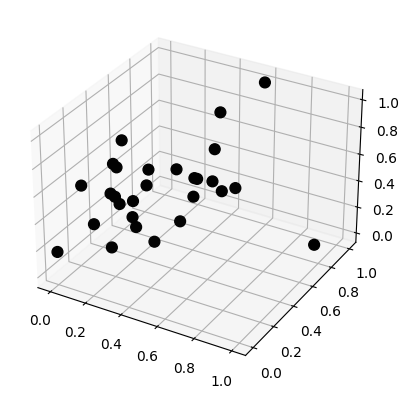

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2],s=60, depthshade=False, c=color)
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Outliers Detection Using IQR, Z-score, LOF

In [25]:
db.head()

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.174,27.178,16.968
1,Arunachal,405.899,17.431,25.821
2,Assam,340.906,16.629,21.293
3,Bihar,179.011,8.833,9.585
4,Chattisgarh,1963.877,17.564,22.373


## IQR Method

In [26]:
Q1 = db.quantile(0.25)
Q3 = db.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
outliers_iqr = db[((db < (Q1 - 1.5 * IQR)) | (db > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected by IQR method:")
print(outliers_iqr)


Outliers detected by IQR method:
         States  per capita CO2 (kg per person)  \
4   Chattisgarh                        1963.877   
5           Goa                        2662.509   
20       Punjab                        1618.081   

    per capita CO (kg per person)  per capita CH4 (kg per person)  
4                          17.564                          22.373  
5                          23.118                           7.615  
20                         27.898                          33.378  


In [41]:
from IPython.display import display

# Assuming 'outliers_iqr' is your DataFrame containing outliers detected by the IQR method
display(outliers_iqr)
# print(outliers_iqr.to_string())

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
4,Chattisgarh,1963.877,17.564,22.373
5,Goa,2662.509,23.118,7.615
20,Punjab,1618.081,27.898,33.378


TypeError: unhashable type: 'numpy.ndarray'

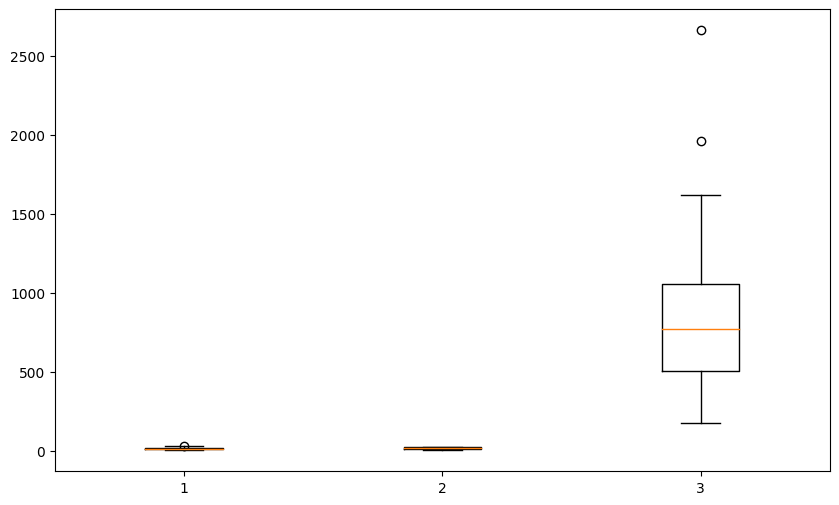

In [31]:
exclude = ['States']
db_new = db.loc[:, db.columns.difference(exclude)]

# Plotting the data without the excluded column
plt.figure(figsize=(10, 6))
plt.boxplot(db_new.values)
plt.scatter(np.ones(len(outliers_iqr)) * 1, outliers_iqr.values, color='red', marker='o')

# Setting the title and labels
plt.title('IQR Outlier Detection')
plt.xlabel('Quartile')
plt.ylabel('Value')

# Show the plot
plt.show()

## Z Score Method

In [34]:
db_new

,per capita CH4 (kg per person),per capita CO (kg per person),per capita CO2 (kg per person)
0,16.968,27.178,974.174
1,25.821,17.431,405.899
2,21.293,16.629,340.906
3,9.585,8.833,179.011
4,22.373,17.564,1963.877
5,7.615,23.118,2662.509
6,12.260,24.010,1310.584
7,21.567,17.895,1381.864
8,18.275,16.977,784.160
9,14.416,15.587,509.032


In [33]:
from scipy import stats

# Calculate Z-scores
df_zscore = db_new.apply(stats.zscore)

# Filter outliers
outliers_zscore = db_new[np.abs(df_zscore) > 3].dropna()
print("\nOutliers detected by Z-score method:")
print(outliers_zscore)


Outliers detected by Z-score method:
Empty DataFrame
Columns: [per capita CH4 (kg per person), per capita CO (kg per person), per capita CO2 (kg per person)]
Index: []


In [35]:
df_zscore

,per capita CH4 (kg per person),per capita CO (kg per person),per capita CO2 (kg per person)
0,0.064648,1.720599,0.148345
1,1.430588,-0.166981,-0.908416
2,0.731957,-0.322295,-1.029277
3,-1.074484,-1.832048,-1.330336
4,0.898592,-0.141225,1.988791
5,-1.378438,0.934349,3.287964
6,-0.661755,1.107092,0.773931
7,0.774233,-0.077124,0.906483
8,0.266307,-0.254902,-0.205004
9,-0.329103,-0.524086,-0.716631


## LOF
  

```
LOF Method is more sophisticated and does not assume any distribution
of the data.
It considers the local density of the points and can be more robust
to outliers.
```


In [37]:
from sklearn.neighbors import LocalOutlierFactor

# Fit the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
yhat = lof.fit_predict(db_new)

# Filter outliers
outliers_lof = db_new[yhat == -1]
print("\nOutliers detected by LOF method:")
print(outliers_lof)


Outliers detected by LOF method:
    per capita CH4 (kg per person)  per capita CO (kg per person)  \
4                           22.373                         17.564   
5                            7.615                         23.118   
20                          33.378                         27.898   

    per capita CO2 (kg per person)  
4                         1963.877  
5                         2662.509  
20                        1618.081  


In [42]:
display(outliers_lof)

,per capita CH4 (kg per person),per capita CO (kg per person),per capita CO2 (kg per person)
4,22.373,17.564,1963.877
5,7.615,23.118,2662.509
20,33.378,27.898,1618.081
